# Bagpack Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
df = pd.read_csv("train.csv")
df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


## Exploring the dataset

In [3]:
print("Information of the dataset: ")
print(df.info())

Information of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None


In [4]:
print("Description of the dataset: ")
print(df.describe())

Description of the dataset: 
                  id   Compartments  Weight Capacity (kg)          Price
count  300000.000000  300000.000000         299862.000000  300000.000000
mean   149999.500000       5.443590             18.029994      81.411107
std     86602.684716       2.890766              6.966914      39.039340
min         0.000000       1.000000              5.000000      15.000000
25%     74999.750000       3.000000             12.097867      47.384620
50%    149999.500000       5.000000             18.068614      80.956120
75%    224999.250000       8.000000             24.002375     115.018160
max    299999.000000      10.000000             30.000000     150.000000


In [5]:
print("Shape of the dataset ", df.shape)

Shape of the dataset  (300000, 11)


## Exploring the null values

In [6]:
df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

## Handling the null values

In [7]:
df['Brand'] = df['Brand'].fillna("Non Branded")

df['Material'] = df['Material'].fillna("Unknown")

df['Size'] = df['Size'].fillna('Unknown')

df['Laptop Compartment'] = df['Laptop Compartment'].fillna("Unknown")

df['Waterproof'] = df['Waterproof'].fillna("Unknown")

df['Style'] = df['Style'].fillna("Unknown")

df['Color'] = df['Color'].fillna('Unique')

weight_mean = df['Weight Capacity (kg)'].mean()
df['Weight Capacity (kg)'] = df['Weight Capacity (kg)'].fillna(weight_mean)

print("After removing all the outliers")
df.isnull().sum()

After removing all the outliers


id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

## Adding Columns for better Graph plotting

In [8]:
bins = [0, 13, 21, 30]
labels = ['Light', 'Medium', 'Heavy']
df['Weight Category'] = pd.cut(df['Weight Capacity (kg)'], bins = bins, labels = labels, right = True)

category_counts = df['Weight Category'].value_counts().reset_index()
category_counts.columns = ['Weight Category', 'Count']

In [9]:
bins = [15, 60, 105, 150]
labels = ['Affordable', 'Medium', 'Expensive']
df['Price Category'] = pd.cut(df['Price'], bins = bins, labels = labels, right = True)

## Skewness

Skewness of numerical columns:
id                      0.000000
Compartments            0.029125
Weight Capacity (kg)   -0.064254
Price                   0.036883
dtype: float64


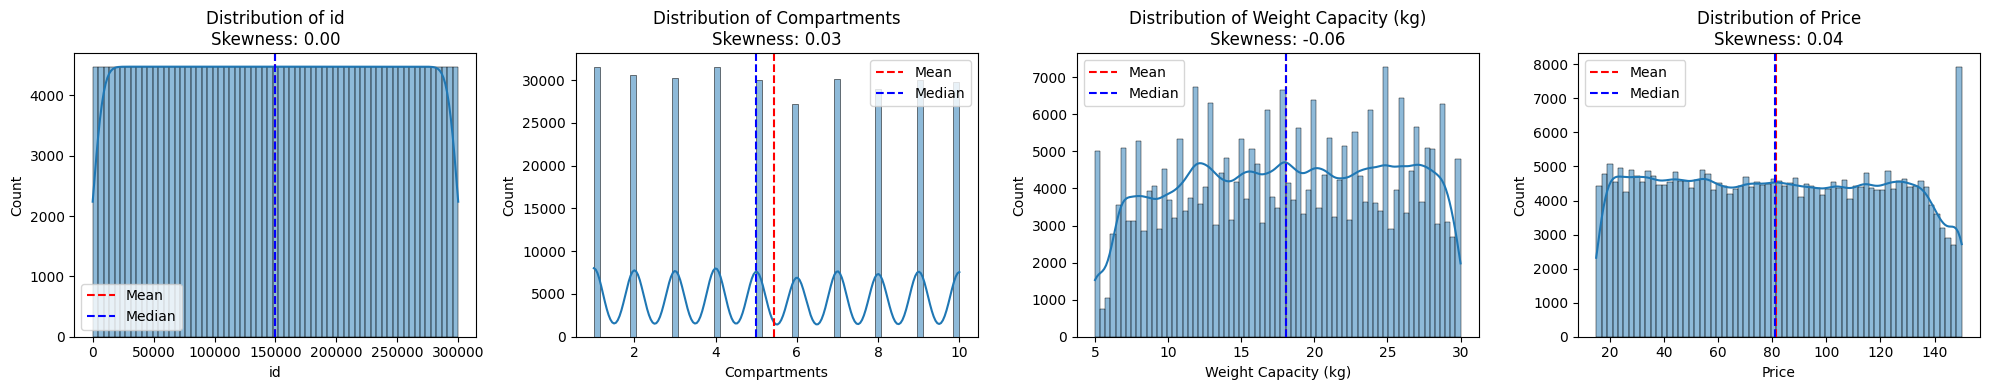

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
skewness = numerical_cols.skew()

# Print skewness values
print("Skewness of numerical columns:")
print(skewness)

# Plotting skewness using subplots for numerical columns
n_cols = len(numerical_cols.columns)

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(5 * n_cols, 4))

# Plot each numerical column
for ax, col in zip(axes, numerical_cols.columns):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}\nSkewness: {skewness[col]:.2f}')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='blue', linestyle='--', label='Median')
    ax.legend()

plt.tight_layout()
plt.show()

In [11]:
df.isnull().sum()

id                        0
Brand                     0
Material                  0
Size                      0
Compartments              0
Laptop Compartment        0
Waterproof                0
Style                     0
Color                     0
Weight Capacity (kg)      0
Price                     0
Weight Category           0
Price Category          693
dtype: int64

## Univariate Analysis

/tmp/ipykernel_4878/3586163581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Brand'], data = df, palette = 'pastel', hue = None)


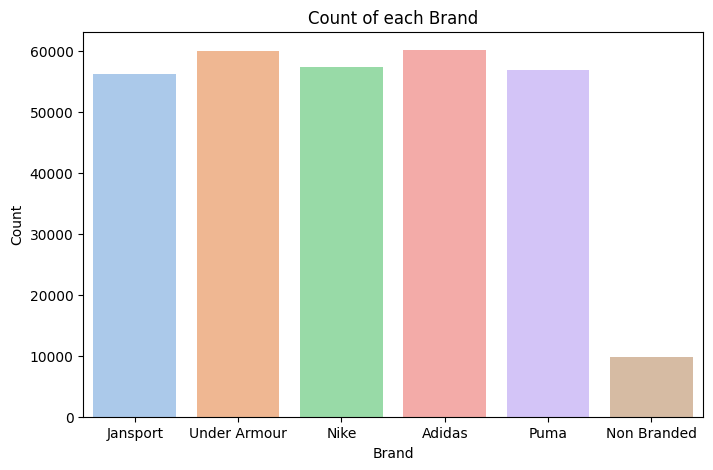

In [12]:
# Brand
plt.figure(figsize = (8, 5))
sns.countplot(x = df['Brand'], data = df, palette = 'pastel', hue = None)

plt.title('Count of each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')

plt.show()

/tmp/ipykernel_4878/691779369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Material'], data = df, palette = 'muted', hue = None)


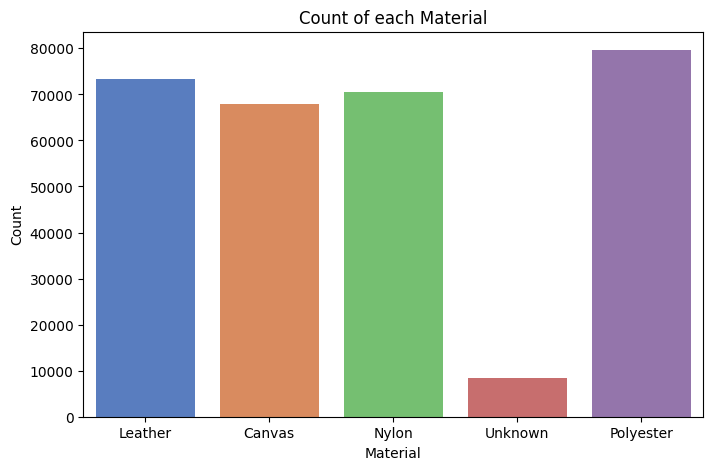

In [13]:
# Brand
plt.figure(figsize = (8, 5))
sns.countplot(x = df['Material'], data = df, palette = 'muted', hue = None)

plt.title('Count of each Material')
plt.xlabel('Material')
plt.ylabel('Count')

plt.show()

/tmp/ipykernel_4878/1909899495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Style'], data = df, palette = 'Set1', hue = None)


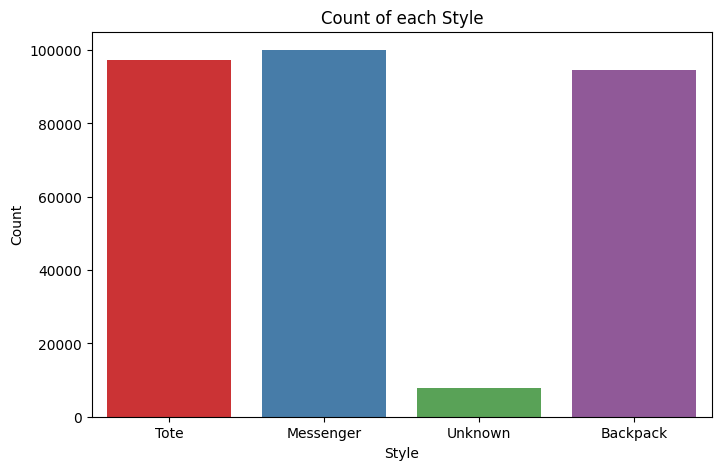

In [14]:
# Brand
plt.figure(figsize = (8, 5))
sns.countplot(x = df['Style'], data = df, palette = 'Set1', hue = None)

plt.title('Count of each Style')
plt.xlabel('Style')
plt.ylabel('Count')

plt.show()

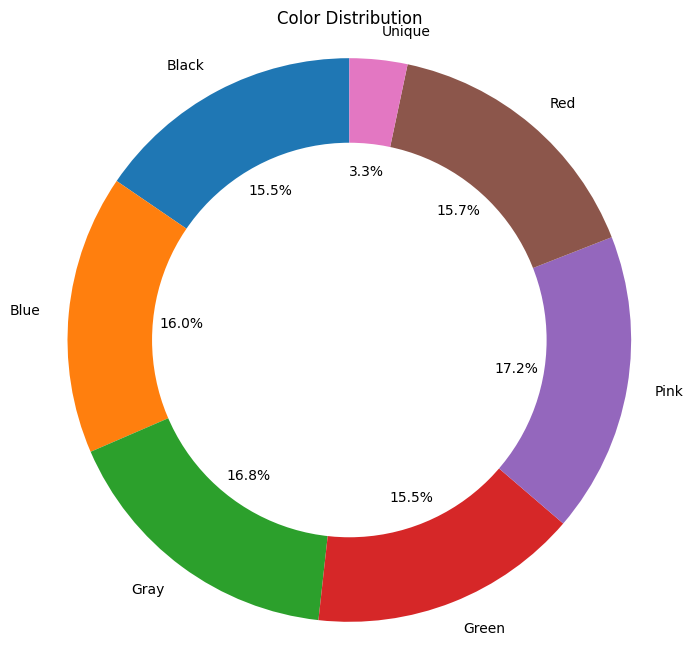

In [15]:
color = df.groupby('Color', as_index = False).count()

plt.figure(figsize=(8, 8))
plt.pie(color['Brand'], labels=color['Color'], autopct='%1.1f%%', startangle=90)

# Draw a white circle in the center to create a doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Color Distribution')
plt.show()


/tmp/ipykernel_4878/2858735969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight Category', y='Count', data=category_counts, palette='pastel')


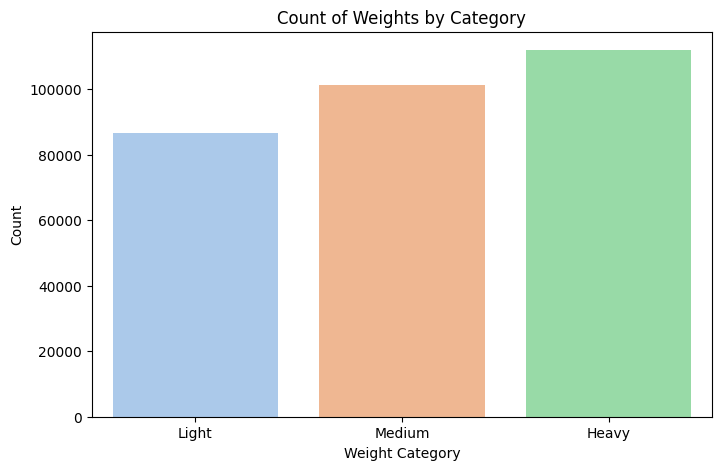

In [16]:
# Weight category
plt.figure(figsize=(8, 5))
sns.barplot(x='Weight Category', y='Count', data=category_counts, palette='pastel')
plt.title('Count of Weights by Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.show()

## Bivariate analysis

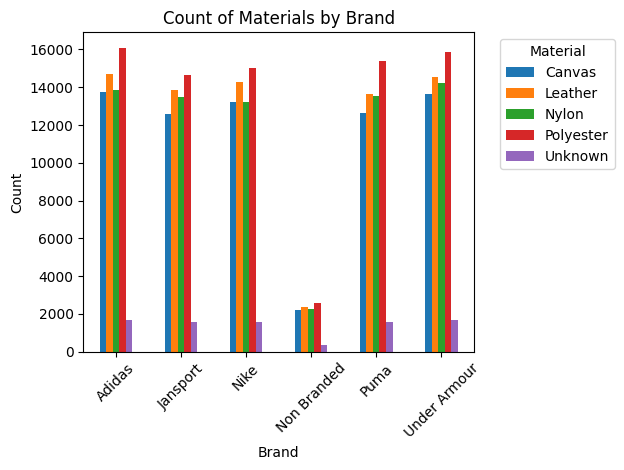

In [17]:
# Brand vs Material
grouped = df.groupby(['Brand', 'Material']).size().reset_index(name='Count')
pivoted = grouped.pivot(index='Brand', columns='Material', values='Count').fillna(0)

pivoted.plot(kind='bar', stacked=False)
plt.title('Count of Materials by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4878/615687433.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Brand', 'Price Category']).size().reset_index(name='Count')


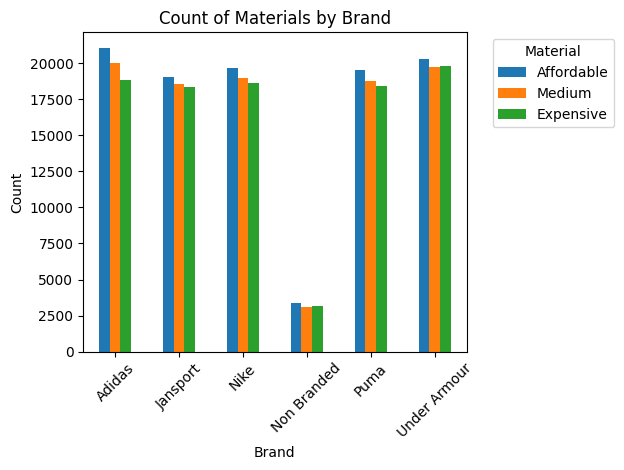

In [18]:
# Brand vs Price
grouped = df.groupby(['Brand', 'Price Category']).size().reset_index(name='Count')
pivoted = grouped.pivot(index='Brand', columns='Price Category', values='Count').fillna(0)

pivoted.plot(kind='bar', stacked=False)
plt.title('Count of Materials by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

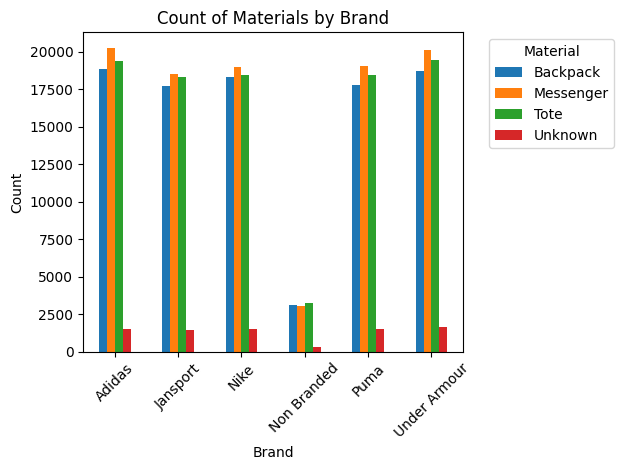

In [19]:
# Brand vs Style
grouped = df.groupby(['Brand', 'Style']).size().reset_index(name='Count')
# Pivot the DataFrame for plotting
pivoted = grouped.pivot(index='Brand', columns='Style', values='Count').fillna(0)

pivoted.plot(kind='bar', stacked=False)
plt.title('Count of Materials by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4878/3684861158.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Brand', 'Weight Category']).size().reset_index(name='Count')


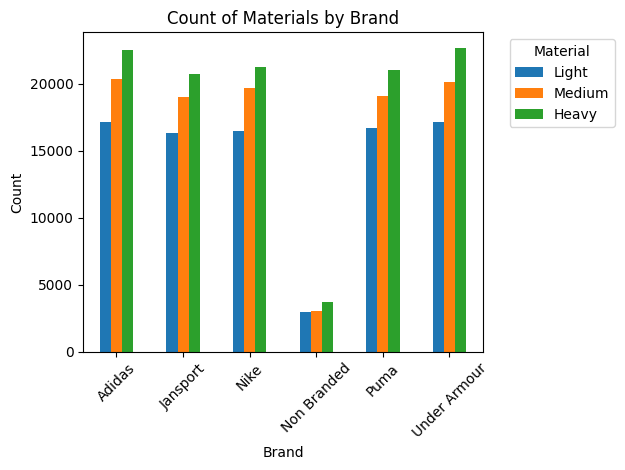

In [20]:
# Brand vs Weight Category
grouped = df.groupby(['Brand', 'Weight Category']).size().reset_index(name='Count')
# Pivot the DataFrame for plotting
pivoted = grouped.pivot(index='Brand', columns='Weight Category', values='Count').fillna(0)

pivoted.plot(kind='bar', stacked=False)
plt.title('Count of Materials by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4878/1327782165.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Material', 'Price Category']).size().reset_index(name='Count')


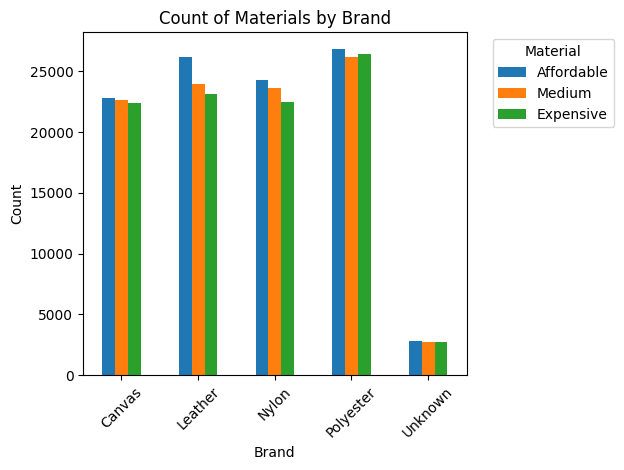

In [21]:
# Material vs Price 
grouped = df.groupby(['Material', 'Price Category']).size().reset_index(name='Count')
# Pivot the DataFrame for plotting
pivoted = grouped.pivot(index='Material', columns='Price Category', values='Count').fillna(0)

pivoted.plot(kind='bar', stacked=False)
plt.title('Count of Materials by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4878/1928063559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Style', 'Price Category']).size().reset_index(name='Count')


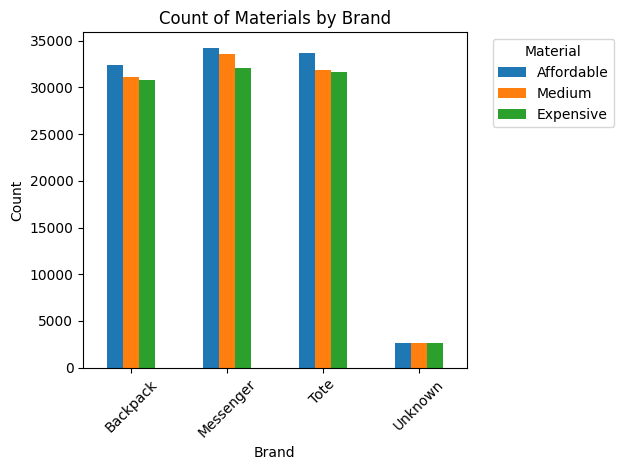

In [22]:
# Style vs Price 
grouped = df.groupby(['Style', 'Price Category']).size().reset_index(name='Count')
# Pivot the DataFrame for plotting
pivoted = grouped.pivot(index='Style', columns='Price Category', values='Count').fillna(0)

pivoted.plot(kind='bar', stacked=False)
plt.title('Count of Materials by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4878/3975827274.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Color', 'Price Category']).size().reset_index(name='Count')


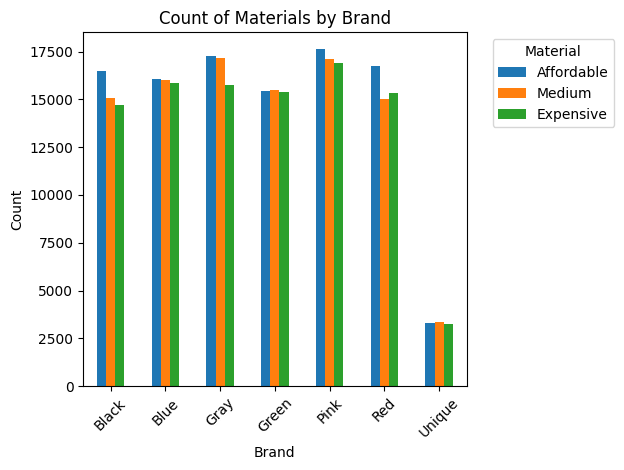

In [23]:
# Color vs Price
grouped = df.groupby(['Color', 'Price Category']).size().reset_index(name='Count')
# Pivot the DataFrame for plotting
pivoted = grouped.pivot(index='Color', columns='Price Category', values='Count').fillna(0)

pivoted.plot(kind='bar', stacked=False)
plt.title('Count of Materials by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Feature Engineering for Model Training

In [24]:
# Drop unwanted columns
new_df = df.drop(['id', 'Waterproof', 'Laptop Compartment', 'Weight Category', 'Price Category'], axis = 1)

In [25]:
new_df

,Brand,Material,Size,Compartments,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...
299995,Adidas,Leather,Small,9.0,Tote,Blue,12.730812,129.99749
299996,Jansport,Leather,Large,6.0,Tote,Blue,26.633182,19.85819
299997,Puma,Canvas,Large,9.0,Backpack,Pink,11.898250,111.41364
299998,Adidas,Nylon,Small,1.0,Tote,Pink,6.175738,115.89080


In [26]:
# Change the float values to int as some models give error for float values
new_df['Compartments'] = new_df['Compartments'].astype(int)
new_df['Price'] = new_df['Price'].astype(int)
new_df['Weight Capacity (kg)'] = new_df['Weight Capacity (kg)'].astype(int)

## Model Training

In [27]:
# Defining X and Y dataset

X = new_df.drop(columns = ['Price'])
Y = new_df['Price']

In [28]:
# Data preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

### Import libraries

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Linear Regression

In [30]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])],
    remainder='passthrough'
)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE score', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score 39.18521675416943


## Ridge Regression

In [31]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])],
    remainder='passthrough'
)

step2 = Ridge()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE score', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score 39.18521621559453


## Lasso Regression

In [32]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])],
    remainder='passthrough'
)

step2 = Lasso()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE score', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score 39.19518883212979


## ElasticNet Regression

In [33]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])],
    remainder='passthrough'
)

step2 = ElasticNet()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE score', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score 39.194135094440185


## Decision Tree

In [34]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])],
    remainder='passthrough'
)

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE score', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score 53.53448599251194


## Extra tree

In [35]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])],
    remainder='passthrough'
)

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE score', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score 39.49093458977512


## Voting

In [36]:
step1 = ColumnTransformer(
    transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 2, 4, 5])],
    remainder='passthrough'
)

ridge_model = Ridge()
linear_model = LinearRegression()
lasso_model = Lasso()

voting_regressor = VotingRegressor(estimators=[
    ('ridge', ridge_model),
    ('linear', linear_model),
    ('lasso', lasso_model)
])

pipe = Pipeline([
    ('step1', step1),
    ('step2', voting_regressor)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 39.18437564768445


## Bagging

In [37]:
step1 = ColumnTransformer(
    transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 2, 4, 5])],
    remainder='passthrough'
)

base_model = Ridge()  # You can change this to LinearRegression() or DecisionTreeRegressor()

bagging_regressor = BaggingRegressor(estimator=base_model, n_estimators=50, random_state=42)

pipe = Pipeline([
    ('step1', step1),
    ('step2', bagging_regressor)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 39.184898304234295


## Random Forest

In [38]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])],
    remainder='passthrough'
)

step2 = RandomForestRegressor(n_estimators = 100, random_state = 42)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 43.9357107695224


## AdaBoost

In [39]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])],
    remainder='passthrough'
)

step2 = AdaBoostRegressor(n_estimators=50, random_state=42)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 39.207410208141226


## K Means Clustering

In [40]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])],
    remainder='passthrough'
)

step2 = KMeans(n_clusters = 3, random_state = 42)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 89.14747095559008


## Gradient Boosting

In [41]:
step1 = ColumnTransformer(
    transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 2, 4, 5, 6])],
    remainder='passthrough'
)

step2 = GradientBoostingRegressor(random_state=42)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 39.187112181786034


## Stacking

In [42]:
step1 = ColumnTransformer(
    transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 2, 4, 5, 6])],
    remainder='passthrough'
)

base_learners = [
    ('lr', LinearRegression()),
    ('gb', GradientBoostingRegressor(random_state=42)),
]

final_estimator = GradientBoostingRegressor(random_state=42)

stacking_model = StackingRegressor(estimators=base_learners, final_estimator=final_estimator)

pipe = Pipeline([
    ('step1', step1),
    ('stacking', stacking_model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 39.18726052784003


## K Nearest Neighbors

In [43]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])],
    remainder='passthrough'
)

step2 = KNeighborsRegressor(n_neighbors = 5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 42.959242254852576


## Support Vector Machine

In [ ]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])],
    remainder='passthrough'
)

step2 = SVR(kernel='rbf')

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

## XGBoost

In [ ]:
step1 = ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5,6])],
    remainder='passthrough'
)

step2 = XGBRegressor(random_state=42)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))